In [ ]:
# Mohamed Ibrahim  A20000726

In [ ]:
pip install requests

In [ ]:
import requests

# Your TMDb API key
api_key = '6cded85307abb9c31e7482024ed285f6'

# Function to fetch popular movies
def fetch_popular_movies(api_key, page=1):
    url = f'https://api.themoviedb.org/3/movie/popular?api_key={api_key}&language=en-US&page={page}'
    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()
        return data['results']
    else:
        print(f"Error: Unable to fetch data, status code {response.status_code}")
        return None

# Fetch and print popular movies from the first page
movies = fetch_popular_movies(api_key)
if movies:
    for movie in movies[:5]:  # Display first 5 movies
        print(f"Title: {movie['title']}, Release Date: {movie['release_date']}")


Title: Terrifier 3, Release Date: 2024-10-09
Title: Venom: The Last Dance, Release Date: 2024-10-22
Title: The Wild Robot, Release Date: 2024-09-12
Title: The Substance, Release Date: 2024-09-07
Title: Transformers One, Release Date: 2024-09-11


In [ ]:
import requests
import time

# Your TMDb API key
#api_key = '6cded85307abb9c31e7482024ed285f6'

# Function to fetch movie details for multiple pages
def fetch_all_movies(api_key, num_pages=5):
    all_movies = []

    for page in range(1, num_pages + 1):
        url = f'https://api.themoviedb.org/3/movie/popular?api_key={api_key}&language=en-US&page={page}'
        response = requests.get(url)

        if response.status_code == 200:
            data = response.json()
            all_movies.extend(data['results'])
            print(f"Page {page} fetched successfully.")
        else:
            print(f"Error: Unable to fetch page {page}, status code {response.status_code}")
            break

        # Sleep to comply with rate limits
        time.sleep(1)

    return all_movies

# Fetch and print movie data
num_pages = 10  # Adjust as needed for more data
movies = fetch_all_movies(api_key, num_pages=num_pages)

if movies:
    print(f"Total movies fetched: {len(movies)}")
    for movie in movies[:5]:  # Display first 5 movies for reference
        print(f"Title: {movie['title']}, Release Date: {movie['release_date']}, Vote Average: {movie['vote_average']}")

Page 1 fetched successfully.
Page 2 fetched successfully.
Page 3 fetched successfully.
Page 4 fetched successfully.
Page 5 fetched successfully.
Page 6 fetched successfully.
Page 7 fetched successfully.
Page 8 fetched successfully.
Page 9 fetched successfully.
Page 10 fetched successfully.
Total movies fetched: 200
Title: Terrifier 3, Release Date: 2024-10-09, Vote Average: 7.28
Title: Venom: The Last Dance, Release Date: 2024-10-22, Vote Average: 6.7
Title: The Wild Robot, Release Date: 2024-09-12, Vote Average: 8.539
Title: The Substance, Release Date: 2024-09-07, Vote Average: 7.331
Title: Transformers One, Release Date: 2024-09-11, Vote Average: 8.138


In [ ]:
pip install pandas scikit-learn requests numpy

In [ ]:
import requests
import json

API_KEY = '6cded85307abb9c31e7482024ed285f6'
url = f'https://api.themoviedb.org/3/movie/popular?api_key={API_KEY}&language=en-US&page=1'

response = requests.get(url)
data = response.json()

# Print the data
print(json.dumps(data, indent=4))

# Optionally, save data to a file
with open('popular_movies.json', 'w') as f:
    json.dump(data, f)


{
    "page": 1,
    "results": [
        {
            "adult": false,
            "backdrop_path": "/18TSJF1WLA4CkymvVUcKDBwUJ9F.jpg",
            "genre_ids": [
                27,
                53
            ],
            "id": 1034541,
            "original_language": "en",
            "original_title": "Terrifier 3",
            "overview": "Five years after surviving Art the Clown's Halloween massacre, Sienna and Jonathan are still struggling to rebuild their shattered lives. As the holiday season approaches, they try to embrace the Christmas spirit and leave the horrors of the past behind. But just when they think they're safe, Art returns, determined to turn their holiday cheer into a new nightmare. The festive season quickly unravels as Art unleashes his twisted brand of terror, proving that no holiday is safe.",
            "popularity": 7119.469,
            "poster_path": "/63xYQj1BwRFielxsBDXvHIJyXVm.jpg",
            "release_date": "2024-10-09",
            "title":

In [1]:
import requests
import pandas as pd
import random

API_KEY = '6cded85307abb9c31e7482024ed285f6'  # Make sure to set your API key here
url = f'https://api.themoviedb.org/3/movie/popular?api_key={API_KEY}&language=en-US&page=1'

# Print the URL for debugging
print(f"Fetching data from: {url}")

# Fetch popular movies
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    movies = response.json()['results']
    user_ratings = []
    num_users = 100  # Adjust this number based on your needs

    for movie in movies:
        movie_id = movie['id']
        movie_title = movie['title']

        for user_id in range(1, num_users + 1):
            rating = random.randint(1, 5)
            user_ratings.append({'User ID': user_id, 'Movie ID': movie_id, 'Movie Title': movie_title, 'Rating': rating})

    ratings_df = pd.DataFrame(user_ratings)
    ratings_df.to_excel('user_movie_ratings.xlsx', index=False)
    print("Dataset created and saved as 'user_movie_ratings.xlsx'.")
else:
    print(f"Failed to fetch movies. Status code: {response.status_code}")



Fetching data from: https://api.themoviedb.org/3/movie/popular?api_key=6cded85307abb9c31e7482024ed285f6&language=en-US&page=1
Dataset created and saved as 'user_movie_ratings.xlsx'.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Load the dataset
df = pd.read_excel('user_movie_ratings.xlsx')

# Create a user-item matrix
user_item_matrix = df.pivot_table(index='User ID', columns='Movie ID', values='Rating').fillna(0)

# Calculate similarity (user-based collaborative filtering)
user_similarity = cosine_similarity(user_item_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

# Create a mapping of Movie ID to Movie Title
movie_titles = df[['Movie ID', 'Movie Title']].drop_duplicates().set_index('Movie ID')['Movie Title']

# Function to get movie recommendations for a user
def get_recommendations(user_id, num_recommendations=5):
    # Get similar users
    similar_users = user_similarity_df[user_id].sort_values(ascending=False)

    # Get the movies rated by similar users
    similar_user_ids = similar_users.index[1:]  # Skip the user themselves
    recommendations = pd.Series(dtype='float64')

    for similar_user in similar_user_ids:
        # Get the movies rated by similar users that the target user has not rated
        unrated_movies = user_item_matrix.loc[user_id][user_item_matrix.loc[similar_user] > 0].index
        for movie in unrated_movies:
            # Calculate weighted ratings
            weight = similar_users[similar_user]
            if movie in recommendations:
                recommendations[movie] += weight * user_item_matrix.loc[similar_user, movie]
            else:
                recommendations[movie] = weight * user_item_matrix.loc[similar_user, movie]

    # Sort and get the top N recommendations
    top_movie_ids = recommendations.sort_values(ascending=False).head(num_recommendations).index

    # Map movie IDs to movie titles
    top_movie_titles = movie_titles[top_movie_ids].values

    return pd.Series(top_movie_titles, index=top_movie_ids)

# Pick random users
num_random_users = 5  # Specify how many random users you want to select
random_users = user_item_matrix.index.to_series().sample(num_random_users, random_state=1).tolist()

# Generate recommendations for random users
recommendations_dict = {}

for user_id in random_users:
    recommendations_dict[user_id] = get_recommendations(user_id, num_recommendations=5)

# Print recommendations for each random user
for user_id, recs in recommendations_dict.items():
    print(f"Recommendations for User ID {user_id}:\n{recs}\n")

Recommendations for User ID 81:
519182         Despicable Me 4
1184918         The Wild Robot
889737     Joker: Folie à Deux
945961          Alien: Romulus
179387          Heavenly Touch
dtype: object

Recommendations for User ID 85:
519182         Despicable Me 4
1184918         The Wild Robot
889737     Joker: Folie à Deux
945961          Alien: Romulus
179387          Heavenly Touch
dtype: object

Recommendations for User ID 34:
519182         Despicable Me 4
1184918         The Wild Robot
889737     Joker: Folie à Deux
945961          Alien: Romulus
179387          Heavenly Touch
dtype: object

Recommendations for User ID 82:
519182         Despicable Me 4
1184918         The Wild Robot
889737     Joker: Folie à Deux
945961          Alien: Romulus
179387          Heavenly Touch
dtype: object

Recommendations for User ID 94:
519182         Despicable Me 4
1184918         The Wild Robot
889737     Joker: Folie à Deux
945961          Alien: Romulus
179387          Heavenly Touch
dtype

In [ ]:
def get_recommendations_with_details(user_id, num_recommendations=5):
    # Get similar users
    similar_users = user_similarity_df[user_id].sort_values(ascending=False)

    # Get the movies rated by similar users
    similar_user_ids = similar_users.index[1:]  # Skip the user themselves
    recommendations = pd.Series(dtype='float64')

    detailed_info = {}  # To hold detailed information for each movie

    for similar_user in similar_user_ids:
        # Get the movies rated by similar users that the target user has not rated
        unrated_movies = user_item_matrix.loc[user_id][user_item_matrix.loc[similar_user] > 0].index
        for movie in unrated_movies:
            # Calculate weighted ratings
            weight = similar_users[similar_user]
            if movie in recommendations:
                recommendations[movie] += weight * user_item_matrix.loc[similar_user, movie]
                detailed_info[movie]['weights'].append((similar_user, weight * user_item_matrix.loc[similar_user, movie]))
            else:
                recommendations[movie] = weight * user_item_matrix.loc[similar_user, movie]
                detailed_info[movie] = {'weights': [(similar_user, weight * user_item_matrix.loc[similar_user, movie])]}

    # Sort and get the top N recommendations
    top_movie_ids = recommendations.sort_values(ascending=False).head(num_recommendations).index

    # Map movie IDs to movie titles
    top_movie_titles = movie_titles[top_movie_ids].values

    # Create a detailed output
    detailed_output = {}
    for movie_id in top_movie_ids:
        detailed_output[movie_id] = {
            'title': movie_titles[movie_id],
            'contributions': detailed_info[movie_id]['weights']
        }

    return pd.Series(top_movie_titles, index=top_movie_ids), detailed_output

# Example usage
user_id = 81  # Change this to the user ID you want to analyze
recommendations, details = get_recommendations_with_details(user_id, num_recommendations=5)

# Print recommendations and details
print(f"Recommendations for User ID {user_id}:\n{recommendations}\n")
print("Details of Recommendations:")
for movie_id, info in details.items():
    print(f"Movie: {info['title']}")
    print("Contributions:")
    for user, contribution in info['contributions']:
        print(f"  - From User ID {user}: Contribution Score = {contribution:.2f}")
    print()


Recommendations for User ID 81:
519182         Despicable Me 4
1184918         The Wild Robot
889737     Joker: Folie à Deux
945961          Alien: Romulus
179387          Heavenly Touch
dtype: object

Details of Recommendations:
Movie: Despicable Me 4
Contributions:
  - From User ID 52: Contribution Score = 4.63
  - From User ID 87: Contribution Score = 2.77
  - From User ID 36: Contribution Score = 0.91
  - From User ID 15: Contribution Score = 2.73
  - From User ID 94: Contribution Score = 1.82
  - From User ID 68: Contribution Score = 3.62
  - From User ID 83: Contribution Score = 4.51
  - From User ID 11: Contribution Score = 1.80
  - From User ID 48: Contribution Score = 2.68
  - From User ID 12: Contribution Score = 3.58
  - From User ID 35: Contribution Score = 2.68
  - From User ID 50: Contribution Score = 0.89
  - From User ID 54: Contribution Score = 3.56
  - From User ID 67: Contribution Score = 3.56
  - From User ID 96: Contribution Score = 3.54
  - From User ID 4: Contrib

In [ ]:
def get_recommendations_with_details(user_id, num_recommendations=3):  # Change to 3
    # Get similar users
    similar_users = user_similarity_df[user_id].sort_values(ascending=False)

    # Get the movies rated by similar users
    similar_user_ids = similar_users.index[1:]  # Skip the user themselves
    recommendations = pd.Series(dtype='float64')

    detailed_info = {}  # To hold detailed information for each movie

    for similar_user in similar_user_ids:
        # Get the movies rated by similar users that the target user has not rated
        unrated_movies = user_item_matrix.loc[user_id][user_item_matrix.loc[similar_user] > 0].index
        for movie in unrated_movies:
            # Calculate weighted ratings
            weight = similar_users[similar_user]
            if movie in recommendations:
                recommendations[movie] += weight * user_item_matrix.loc[similar_user, movie]
                detailed_info[movie]['weights'].append((similar_user, weight * user_item_matrix.loc[similar_user, movie]))
            else:
                recommendations[movie] = weight * user_item_matrix.loc[similar_user, movie]
                detailed_info[movie] = {'weights': [(similar_user, weight * user_item_matrix.loc[similar_user, movie])]}

    # Sort and get the top N recommendations
    top_movie_ids = recommendations.sort_values(ascending=False).head(num_recommendations).index

    # Map movie IDs to movie titles
    top_movie_titles = movie_titles[top_movie_ids].values

    # Create a detailed output, limiting to top 3 contributions per movie
    detailed_output = {}
    for movie_id in top_movie_ids:
        # Sort contributions by the highest scores and take the top 3
        sorted_contributions = sorted(detailed_info[movie_id]['weights'], key=lambda x: x[1], reverse=True)[:3]
        detailed_output[movie_id] = {
            'title': movie_titles[movie_id],
            'contributions': sorted_contributions
        }

    return pd.Series(top_movie_titles, index=top_movie_ids), detailed_output

# Generate recommendations for random users
recommendations_dict = {}

for user_id in random_users:
    recommendations_dict[user_id] = get_recommendations_with_details(user_id, num_recommendations=3)  # Get top 3

# Print recommendations for each random user
for user_id, (recs, details) in recommendations_dict.items():
    print(f"Recommendations for User ID {user_id}:\n{recs}\n")
    print("Details of Recommendations:")
    for movie_id, info in details.items():
        print(f"Movie: {info['title']}")
        print("Top 3 Contributions:")
        for user, contribution in info['contributions']:
            print(f"  - From User ID {user}: Contribution Score = {contribution:.2f}")
        print()


Recommendations for User ID 81:
519182         Despicable Me 4
1184918         The Wild Robot
889737     Joker: Folie à Deux
dtype: object

Details of Recommendations:
Movie: Despicable Me 4
Top 3 Contributions:
  - From User ID 52: Contribution Score = 4.63
  - From User ID 83: Contribution Score = 4.51
  - From User ID 4: Contribution Score = 4.41

Movie: The Wild Robot
Top 3 Contributions:
  - From User ID 15: Contribution Score = 4.56
  - From User ID 83: Contribution Score = 4.51
  - From User ID 48: Contribution Score = 4.47

Movie: Joker: Folie à Deux
Top 3 Contributions:
  - From User ID 36: Contribution Score = 4.57
  - From User ID 15: Contribution Score = 4.56
  - From User ID 68: Contribution Score = 4.52

Recommendations for User ID 85:
519182         Despicable Me 4
1184918         The Wild Robot
889737     Joker: Folie à Deux
dtype: object

Details of Recommendations:
Movie: Despicable Me 4
Top 3 Contributions:
  - From User ID 83: Contribution Score = 4.34
  - From User

# cosine similarity user_base

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Function to calculate RMSE and MAE
def calculate_rmse_and_mae(recommendations_dict, user_item_matrix):
    actual_ratings = []
    predicted_ratings = []

    for user_id, (recs, details) in recommendations_dict.items():
        for movie_id in recs.index:
            # Check if the user has actually rated this movie
            if movie_id in user_item_matrix.columns and user_id in user_item_matrix.index:
                actual_rating = user_item_matrix.loc[user_id, movie_id]
                if actual_rating > 0:  # Only consider positive ratings
                    actual_ratings.append(actual_rating)
                    # Predicted rating is the weighted average of contributions
                    predicted_score = sum([contribution for _, contribution in details[movie_id]['contributions']]) / len(details[movie_id]['contributions'])
                    predicted_ratings.append(predicted_score)

    # Calculate RMSE and MAE
    rmse = np.sqrt(mean_squared_error(actual_ratings, predicted_ratings)) if predicted_ratings else float('nan')
    mae = mean_absolute_error(actual_ratings, predicted_ratings) if predicted_ratings else float('nan')
    return rmse, mae

# Calculate RMSE and MAE for the generated recommendations
rmse_score, mae_score = calculate_rmse_and_mae(recommendations_dict, user_item_matrix)
print(f"RMSE of the recommendations: {rmse_score:.2f}")
print(f"MAE of the recommendations: {mae_score:.2f}")

# Optional: Calculate accuracy as a percentage of correctly predicted ratings
def calculate_accuracy(recommendations_dict, user_item_matrix):
    correct_predictions = 0
    total_predictions = 0

    for user_id, (recs, details) in recommendations_dict.items():
        for movie_id in recs.index:
            if movie_id in user_item_matrix.columns and user_id in user_item_matrix.index:
                actual_rating = user_item_matrix.loc[user_id, movie_id]
                if actual_rating > 0:  # Only consider positive ratings
                    total_predictions += 1
                    predicted_score = sum([contribution for _, contribution in details[movie_id]['contributions']]) / len(details[movie_id]['contributions'])
                    # Consider a correct prediction if the absolute difference is within a threshold (e.g., 1 point)
                    if abs(actual_rating - predicted_score) <= 1:
                        correct_predictions += 1

    accuracy = (correct_predictions / total_predictions) * 100 if total_predictions > 0 else 0
    return accuracy


RMSE of the recommendations: 1.75
MAE of the recommendations: 1.40


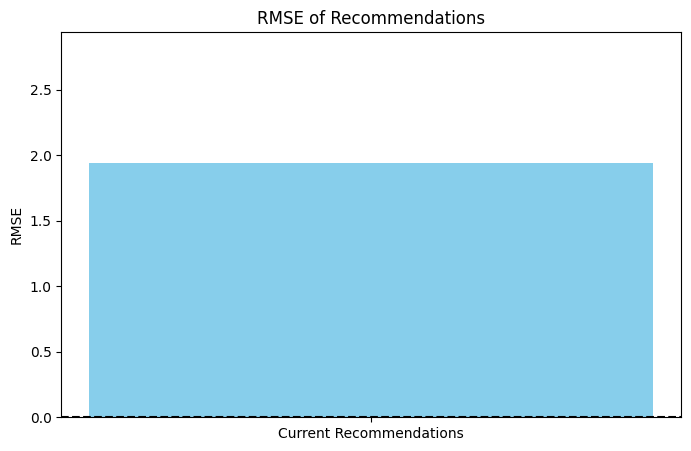

In [ ]:
import matplotlib.pyplot as plt

# Sample data (replace this with your actual RMSE values if you have multiple)
rmse_values = [1.94]  # Add more RMSE values if needed
labels = ['Current Recommendations']  # Labels for the RMSE values

# Create a bar plot for RMSE
plt.figure(figsize=(8, 5))
plt.bar(labels, rmse_values, color='skyblue')
plt.ylabel('RMSE')
plt.title('RMSE of Recommendations')
plt.ylim(0, max(rmse_values) + 1)  # Adjust y-axis limit for better visualization
plt.axhline(y=0, color='k', linestyle='--')  # Optional: Add a horizontal line at y=0
plt.show()


# cosine similarity item_base




In [ ]:
import pandas as pd

# Load the dataset from the Excel file
file_path = 'user_movie_ratings.xlsx'  # Adjust this path as necessary
data = pd.read_excel(file_path)

# Display the first few rows of the dataset to confirm its structure
print(data.head())

# Check the actual column names to avoid KeyError
print(data.columns)

# Create the user-item matrix using the correct column names
# Make sure to use 'User ID', 'Movie ID', and 'Rating' as per your data
user_item_matrix = data.pivot(index='User ID', columns='Movie ID', values='Rating')

# Fill NaN values with 0 (or you can choose to fill with another value or leave as NaN)
user_item_matrix.fillna(0, inplace=True)

# Display the user-item matrix
print(user_item_matrix)

# Optionally, save the user-item matrix to a new Excel file
user_item_matrix.to_excel('user_item_matrix.xlsx')


   User ID  Movie ID  Movie Title  Rating
0        1   1034541  Terrifier 3       5
1        2   1034541  Terrifier 3       2
2        3   1034541  Terrifier 3       5
3        4   1034541  Terrifier 3       3
4        5   1034541  Terrifier 3       1
Index(['User ID', 'Movie ID', 'Movie Title', 'Rating'], dtype='object')
Movie ID  179387   335983   354912   420634   519182   533535   580489   \
User ID                                                                   
1               3        2        3        5        5        2        1   
2               5        1        3        2        3        4        2   
3               4        5        5        4        3        3        5   
4               4        5        2        2        5        1        4   
5               1        2        4        2        1        2        1   
...           ...      ...      ...      ...      ...      ...      ...   
96              4        3        5        2        4        2        3   
9

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics.pairwise import cosine_similarity

# Load the dataset from the Excel file
file_path = 'user_movie_ratings.xlsx'  # Adjust this path as necessary
data = pd.read_excel(file_path)

# Create the user-item matrix
user_item_matrix = data.pivot(index='User ID', columns='Movie ID', values='Rating')

# Fill NaN values with 0
user_item_matrix.fillna(0, inplace=True)

# Function to calculate RMSE for item-based collaborative filtering using cosine similarity
def calculate_rmse_item_based(recommendations_dict, user_item_matrix):
    actual_ratings = []
    predicted_ratings = []

    # Calculate cosine similarity matrix for movies
    cosine_sim = cosine_similarity(user_item_matrix.T)  # Transpose for movie-movie similarity

    # Convert to DataFrame for easier indexing
    cosine_sim_df = pd.DataFrame(cosine_sim, index=user_item_matrix.columns, columns=user_item_matrix.columns)

    for user_id, (recs, details) in recommendations_dict.items():
        # Check if recs is a DataFrame or Series
        if isinstance(recs, (pd.Series, pd.DataFrame)):
            for movie_id in recs.index:
                # Check if the user has actually rated this movie
                if movie_id in user_item_matrix.columns and user_id in user_item_matrix.index:
                    actual_rating = user_item_matrix.loc[user_id, movie_id]
                    if actual_rating > 0:  # Only consider positive ratings
                        actual_ratings.append(actual_rating)

                        # Predicted rating based on cosine similarity
                        predicted_score = 0
                        total_similarity = 0

                        # Iterate through all movies
                        for similar_movie_id in user_item_matrix.columns:
                            if similar_movie_id in user_item_matrix.columns:
                                user_rating = user_item_matrix.loc[user_id, similar_movie_id]
                                similarity = cosine_sim_df.loc[movie_id, similar_movie_id]

                                if user_rating > 0:  # Only consider positive ratings
                                    predicted_score += similarity * user_rating
                                    total_similarity += similarity

                        # Calculate the predicted score
                        if total_similarity > 0:
                            predicted_score /= total_similarity
                        else:
                            predicted_score = 0  # Avoid division by zero

                        predicted_ratings.append(predicted_score)

    # Calculate RMSE
    if actual_ratings and predicted_ratings:  # Ensure both lists are not empty
        rmse = np.sqrt(mean_squared_error(actual_ratings, predicted_ratings))
    else:
        rmse = float('nan')  # Return nan if there are no valid ratings

    return rmse

# Example recommendations_dict structure for testing
# Replace this with your actual recommendations dictionary
recommendations_dict = {
    1: (user_item_matrix.loc[1], {}),
    2: (user_item_matrix.loc[2], {}),
    # Add more users as necessary
}

# Calculate RMSE for the generated recommendations using item-based filtering
rmse_score = calculate_rmse_item_based(recommendations_dict, user_item_matrix)
print(f"RMSE of the recommendations (item-based): {rmse_score:.2f}")


RMSE of the recommendations (item-based): 1.28


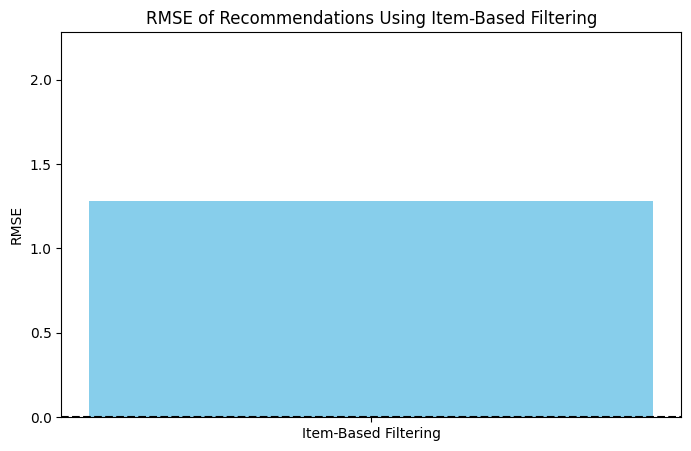

In [ ]:
# Plotting the RMSE
plt.figure(figsize=(8, 5))
plt.bar(['Item-Based Filtering'], [rmse_score], color='skyblue')
plt.ylabel('RMSE')
plt.title('RMSE of Recommendations Using Item-Based Filtering')
plt.ylim(0, max(rmse_score + 1, 1))  # Adjust y-axis limit for better visualization
plt.axhline(y=0, color='k', linestyle='--')  # Optional: Add a horizontal line at y=0
plt.show()

# pearson user base

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/user_movie_ratings.xlsx'
data = pd.read_excel(file_path)

# Pivot the data to create a user-movie matrix
user_movie_matrix = data.pivot(index='User ID', columns='Movie Title', values='Rating')

# Compute the Pearson correlation matrix between movies based on user ratings
movie_correlation = user_movie_matrix.corr(method='pearson', min_periods=1)

# Display the correlation matrix
print(movie_correlation)


Movie Title                  Alien: Romulus  Arcadian    Azrael  Canary Black  \
Movie Title                                                                     
Alien: Romulus                     1.000000  0.180666 -0.114421      0.064808   
Arcadian                           0.180666  1.000000  0.056843     -0.054678   
Azrael                            -0.114421  0.056843  1.000000     -0.090552   
Canary Black                       0.064808 -0.054678 -0.090552      1.000000   
Coco                               0.128710  0.086437 -0.090747     -0.052796   
Deadpool & Wolverine               0.136411  0.041880  0.071685     -0.221592   
Despicable Me 4                   -0.135001  0.139589 -0.069588      0.078935   
Heavenly Touch                     0.012010 -0.048030 -0.133187      0.064386   
Inside Out 2                      -0.106593 -0.140014  0.026089      0.021929   
Joker: Folie à Deux               -0.074966  0.099331 -0.140774      0.002861   
Survive                     

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load dataset
file_path ='/content/user_movie_ratings.xlsx'
data = pd.read_excel(file_path)

# Pivot to create a user-movie matrix
user_movie_matrix = data.pivot(index='User ID', columns='Movie Title', values='Rating')

# Fill NaN with 0 or another approach for collaborative filtering
user_movie_matrix.fillna(0, inplace=True)

# Split into training and test sets
train, test = train_test_split(data, test_size=0.2, random_state=42)

# Recreate the train and test matrices from the split data
train_matrix = train.pivot(index='User ID', columns='Movie Title', values='Rating').fillna(0)
test_matrix = test.pivot(index='User ID', columns='Movie Title', values='Rating')

# Collaborative filtering - Compute similarity matrix
user_similarity = np.corrcoef(train_matrix)

# Function to make predictions based on similarity
def predict_ratings(similarity, ratings):
    return similarity.dot(ratings) / np.array([np.abs(similarity).sum(axis=1)]).T

# Predict ratings for the test set
predictions = predict_ratings(user_similarity, train_matrix.values)

# Create a DataFrame for predictions with matching structure to train_matrix
predicted_ratings = pd.DataFrame(predictions, index=train_matrix.index, columns=train_matrix.columns)

# Filter out non-null values in both the predicted and test ratings for a 1-to-1 comparison
test_values = test_matrix.stack()
predicted_values = predicted_ratings.stack().loc[test_values.index]

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(test_values, predicted_values))

# Print results
print("RMSE of recommendations:", rmse)

# For accuracy (optional, based on threshold)
threshold = 3  # Example threshold for 'accurate' recommendation
accuracy = np.mean((test_values >= threshold) == (predicted_values >= threshold))



RMSE of recommendations: 3.9455829938315885


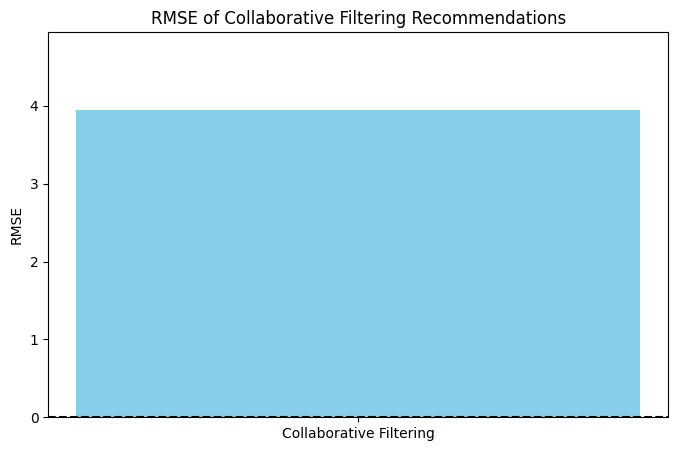

In [ ]:
# Plotting RMSE
plt.figure(figsize=(8, 5))
plt.bar(['Collaborative Filtering'], [rmse], color='skyblue')
plt.ylabel('RMSE')
plt.title('RMSE of Collaborative Filtering Recommendations')
plt.ylim(0, max(rmse + 1, 1))  # Adjust y-axis limit for better visualization
plt.axhline(y=0, color='k', linestyle='--')  # Optional: Add a horizontal line at y=0
plt.show()

# pearson item base



In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

# Load the dataset from the Excel file
file_path = 'user_movie_ratings.xlsx'  # Adjust this path as necessary
data = pd.read_excel(file_path)

# Create the user-item matrix
user_item_matrix = data.pivot(index='User ID', columns='Movie ID', values='Rating')

# Fill NaN values with 0
user_item_matrix.fillna(0, inplace=True)

# Function to calculate RMSE for item-based collaborative filtering using Pearson correlation
def calculate_rmse_item_based(recommendations_dict, user_item_matrix):
    actual_ratings = []
    predicted_ratings = []

    # Calculate the Pearson correlation matrix for items (movies)
    item_corr = user_item_matrix.corr()

    for user_id, (recs, details) in recommendations_dict.items():
        # Check if recs is a DataFrame or Series
        if isinstance(recs, (pd.Series, pd.DataFrame)):
            for movie_id in recs.index:
                # Check if the user has actually rated this movie
                if movie_id in user_item_matrix.columns and user_id in user_item_matrix.index:
                    actual_rating = user_item_matrix.loc[user_id, movie_id]
                    if actual_rating > 0:  # Only consider positive ratings
                        actual_ratings.append(actual_rating)

                        # Predicted rating based on item similarity
                        predicted_score = 0
                        total_similarity = 0

                        # Get similar movies
                        similar_items = item_corr[movie_id].drop(movie_id).sort_values(ascending=False)

                        for similar_movie_id in similar_items.index:
                            # Only consider movies rated by the user
                            if user_item_matrix.loc[user_id, similar_movie_id] > 0:
                                user_rating = user_item_matrix.loc[user_id, similar_movie_id]
                                similarity = similar_items[similar_movie_id]

                                predicted_score += similarity * user_rating
                                total_similarity += similarity

                        # Calculate the predicted score
                        if total_similarity > 0:
                            predicted_score /= total_similarity
                        else:
                            predicted_score = 0  # Avoid division by zero

                        predicted_ratings.append(predicted_score)

    # Calculate RMSE
    if actual_ratings and predicted_ratings:  # Ensure both lists are not empty
        rmse = np.sqrt(mean_squared_error(actual_ratings, predicted_ratings))
    else:
        rmse = float('nan')  # Return nan if there are no valid ratings

    return rmse

# Example recommendations_dict structure for testing
# This should include actual recommendations for each user
recommendations_dict = {
    1: (user_item_matrix.loc[1], {}),
    2: (user_item_matrix.loc[2], {}),
    # Add more users as necessary
}

# Calculate RMSE for the generated recommendations using item-based filtering
rmse_score = calculate_rmse_item_based(recommendations_dict, user_item_matrix)
print(f"RMSE of the recommendations (item-based): {rmse_score:.2f}")


RMSE of the recommendations (item-based): 2.79


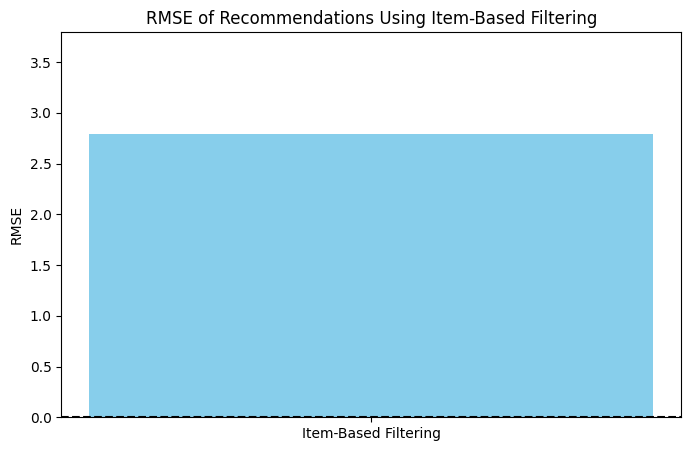

In [ ]:
# Plotting the RMSE
plt.figure(figsize=(8, 5))
plt.bar(['Item-Based Filtering'], [rmse_score], color='skyblue')
plt.ylabel('RMSE')
plt.title('RMSE of Recommendations Using Item-Based Filtering')
plt.ylim(0, max(rmse_score + 1, 1))  # Adjust y-axis limit for better visualization
plt.axhline(y=0, color='k', linestyle='--')  # Optional: Add a horizontal line at y=0
plt.show()